In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import gensim.models as gsm
import gensim.downloader
import pandas as pd
import time
import string
import nltk
nltk.download('punkt')
import numpy as np
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Load Data - Full Data

### Raw Data

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/2021_NLU/data/full_data/emoji_nsp_dataset_train.csv')
df_val = pd.read_csv('/content/drive/MyDrive/2021_NLU/data/full_data/emoji_nsp_dataset_valid.csv')
df_test = pd.read_csv('/content/drive/MyDrive/2021_NLU/data/full_data/emoji_nsp_dataset_test.csv')

In [ ]:
df_train.head()

,index,tweets,emoji_sentence,follows?
0,50553,The dababy memes make no sense and that’s why ...,😭,1
1,74541,a year ago today i would be holding my breath ...,😵,0
2,50992,I told my mama about how the music industry is...,💯,1
3,95343,[USER] [USER] Thankyou guys,💯,0
4,60555,You want new SUBS? Like ️ Retweet Follow me R...,😂😂,0


In [ ]:
df_train.count()

index             15540
tweets            15540
emoji_sentence    15540
follows?          15540
dtype: int64

### Load Tokens

In [ ]:
with open('/content/drive/MyDrive/2021_NLU/data/full_data/full_data.pkl', 'rb') as f:  
    x_train_tokenized, x_train_normal, x_val_tokenized, x_val_normal, x_test_tokenized, x_test_normal, empty_indices_train, x_train_tokenized_2, \
                 x_train_normal_2, empty_indices_val, x_val_tokenized_2, x_val_normal_2, y_train, y_val, y_train_2, y_val_2, y_test, y_test_2,\
                 empty_indices_test, x_test_normal_2, x_test_tokenized_2 = pickle.load(f)

In [ ]:
df_test['tokenized_tweets'] = x_test_tokenized
df_test['tokenized_len'] = df_test['tokenized_tweets'].apply(lambda x: len(x))
print(df_test['tokenized_len'].mean())
print(df_test['tokenized_len'].median())

14.242000901306895
10.0


### Load Vectors

In [ ]:
#AVERAGE VECTORS
with open('/content/drive/MyDrive/2021_NLU/data/full_data/full_vec.pkl', 'rb') as f:  
    X_train_vec, X_val_vec, X_test_vec = pickle.load(f)

In [ ]:
#CONCATENATED VECTORS
with open('/content/drive/MyDrive/2021_NLU/data/full_data/full_vec.pkl', 'rb') as f:  
    X_train_vec_concat, X_val_vec_concat, X_test_vec_concat = pickle.load(f)

## Load Data FULL DATA (SINGLE AND MULTI) WITH NO REPEATS 

### Raw Data

In [ ]:
df_mul_train = pd.read_csv('/content/drive/MyDrive/2021_NLU/data/no_repeats/emoji_nsp_dataset_no_repeats_train.csv')
df_mul_val = pd.read_csv('/content/drive/MyDrive/2021_NLU/data/no_repeats/emoji_nsp_dataset_no_repeats_valid.csv')
df_mul_test = pd.read_csv('/content/drive/MyDrive/2021_NLU/data/no_repeats/emoji_nsp_dataset_no_repeats_test.csv')

In [ ]:
df_mul_train.head()

,index,tweets,emoji_sentence,follows?
0,50553,The dababy memes make no sense and that’s why ...,😭,1
1,74541,a year ago today i would be holding my breath ...,🙏,0
2,50992,I told my mama about how the music industry is...,💯,1
3,95343,[USER] [USER] Thankyou guys,💀,0
4,60555,You want new SUBS? Like ️ Retweet Follow me R...,😬,0


### Load Tokens

In [ ]:
with open('/content/drive/MyDrive/2021_NLU/data/no_repeats/mul_emojis.pkl', 'rb') as f:  
    x_train_mul_tokenized, x_train_mul_normal, x_val_mul_tokenized, x_val_mul_normal, x_test_mul_tokenized, x_test_mul_normal, empty_indices_mul_train, x_train_mul_tokenized_2, \
                 x_train_mul_normal_2, empty_indices_mul_val, x_val_mul_tokenized_2, x_val_mul_normal_2, y_mul_train, y_mul_val, y_train_mul_2, y_val_mul_2, y_mul_test, y_test_mul_2,\
                 empty_indices_mul_test, x_test_mul_normal_2, x_test_mul_tokenized_2 = pickle.load(f)

### Load Vectors

In [ ]:
# AVERAGE VECTORS
with open('/content/drive/MyDrive/2021_NLU/data/no_repeats/mul_emojis_vec.pkl', 'rb') as f:  
    X_train_mul_vec, X_val_mul_vec, X_test_mul_vec = pickle.load(f)

In [ ]:
# CONCATENATED VECTORS
with open('/content/drive/MyDrive/2021_NLU/data/no_repeats/mul_emojis_vec.pkl', 'rb') as f:  
    X_train_mul_vec_concat, X_val_mul_vec_concat, X_test_mul_vec_concat = pickle.load(f)

## LogisticRegression Model

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

def metric(y_true, y_pred):
    return f1_score(y_true, y_pred, average='weighted')

my_scorer = make_scorer(metric, greater_is_better=True)

In [ ]:
def run_model(model, X_train, y_train, X_val, y_val):
  print('     ## Fitting')
  model.fit(X_train, y_train)
  print('     ## Predicting')
  preds = model.predict(X_val)
  print(' ## F1 Score (weighted) is -', f1_score(y_val, preds, average='weighted'))
  print(' ## Accuracy is -', accuracy_score(y_val, preds))
  print('      ')
  print('               Confusion Matrix')
  print(confusion_matrix(y_val, preds))

In [ ]:
lr = LogisticRegression()

In [ ]:
def run_model_gridsearch_lr(model, X_train, y_train, X_val, y_val):
  
  cv=5
  parameters = {'C': np.logspace(0, 4, 10),'penalty': ['l1', 'l2']}
  clf = GridSearchCV(model, parameters, cv=cv, n_jobs=-1, scoring=my_scorer, verbose=0)
  print(' ## Fitting GridSearch')
  clf.fit(X_train, y_train)

  print("tuned hpyerparameters :(best parameters) ",clf.best_params_)
  print("score :",clf.best_score_)

In [ ]:
def scores(y_val, preds):
  print(' ## F1 Score (weighted) is -', f1_score(y_val, preds, average='weighted'))
  print(' ## Accuracy is -', accuracy_score(y_val, preds))
  print('      ')
  print('               Confusion Matrix')
  print(confusion_matrix(y_val, preds))

###**LR with FULL DATA**

#### With Averaged Vectors

In [ ]:
# BASELINE
run_model(lr, X_train_vec, y_train, X_val_vec, y_val)

     ## Fitting
     ## Predicting
 ## F1 Score (weighted) is - 0.5179993984471877
 ## Accuracy is - 0.517962710322874
      
               Confusion Matrix
[[558 522]
 [538 581]]


In [ ]:
run_model_gridsearch_lr(lr, X_train_vec, y_train, X_val_vec, y_val)

 ## Fitting GridSearch
tuned hpyerparameters :(best parameters)  {'C': 3593.813663804626, 'penalty': 'l2'}
score : 0.515086937552015


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# FINESUNED 
best_lr_full = LogisticRegression(penalty = 'l2', C = 3593.813663804626)
run_model(best_lr_full, X_train_vec, y_train, X_val_vec, y_val)

     ## Fitting
     ## Predicting
 ## F1 Score (weighted) is - 0.5197692060167853
 ## Accuracy is - 0.519781718963165
      
               Confusion Matrix
[[573 507]
 [549 570]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**PREDICTION ON TEST (w Avg Vectors)**

In [ ]:
#BASELINE RESULT
pred_lr_full_base = lr.predict(X_test_vec)
pred_lr_full_prob_base = lr.predict_proba(X_test_vec)
scores(y_test, pred_lr_full_base)

 ## F1 Score (weighted) is - 0.5173889777206634
 ## Accuracy is - 0.5173501577287066
      
               Confusion Matrix
[[1170 1089]
 [1053 1126]]


In [ ]:
#FINETUNED RESULT
pred_lr_full = best_lr_full.predict(X_test_vec)
pred_lr_full_prob = best_lr_full.predict_proba(X_test_vec)
scores(y_test, pred_lr_full)

 ## F1 Score (weighted) is - 0.5245992385409034
 ## Accuracy is - 0.5245606128886886
      
               Confusion Matrix
[[1184 1075]
 [1035 1144]]


In [ ]:
pred_lr_full_prob #[prob for class0, prob for class1]

array([[0.45513382, 0.54486618],
       [0.4308906 , 0.5691094 ],
       [0.37023349, 0.62976651],
       ...,
       [0.50978928, 0.49021072],
       [0.5311429 , 0.4688571 ],
       [0.40109193, 0.59890807]])

#### With Concantenated Vectors

In [ ]:
#BASELINE
run_model(lr, X_train_vec_concat, y_train, X_val_vec_concat, y_val)

     ## Fitting
     ## Predicting
 ## F1 Score (weighted) is - 0.5179993984471877
 ## Accuracy is - 0.517962710322874
      
               Confusion Matrix
[[558 522]
 [538 581]]


In [ ]:
run_model_gridsearch_lr(lr, X_train_vec_concat, y_train, X_val_vec_concat, y_val)

 ## Fitting GridSearch
tuned hpyerparameters :(best parameters)  {'C': 2.7825594022071245, 'penalty': 'l2'}
score : 0.5128374049413716


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#FINETUNED
best_lr_full_concat = LogisticRegression(penalty = 'l2', C = 2.7825594022071245)
run_model(best_lr_full_concat, X_train_vec_concat, y_train, X_val_vec_concat, y_val)

     ## Fitting
     ## Predicting
 ## F1 Score (weighted) is - 0.5178031935717086
 ## Accuracy is - 0.517962710322874
      
               Confusion Matrix
[[582 498]
 [562 557]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


##**ERROR ANALYSIS FOR BEST RESULTS (FULL DATA w Avg Vectors)**

In [ ]:
def evaluate_incorrect(y_test, preds, input_df, preds_prob):
  df_test = input_df.copy()
  df_test['prob_zero'] = preds_prob[:, 0]
  print(df_test.shape)
  eval_incorrect = df_test.index[y_test != preds]

  output_incorrect = df_test[df_test.index.isin(eval_incorrect)]
  # print(eval)
  # print(eval.shape)
  # print(y_test != preds)
  # print(y_test == preds)

  return output_incorrect

In [ ]:
def evaluate_correct(y_test, preds, input_df, preds_prob):
  df_test = input_df.copy()
  df_test['prob_zero'] = preds_prob[:, 0]
  print(df_test.shape)

  eval_correct = df_test.index[y_test == preds]
  output_correct = df_test[df_test.index.isin(eval_correct)]
  # print(eval)
  # print(eval.shape)
  # print(y_test != preds)
  # print(y_test == preds)

  return output_correct

In [ ]:
best_lr_full = LogisticRegression(penalty = 'l2', C = 3593.813663804626)
run_model(best_lr_full, X_train_vec, y_train, X_val_vec, y_val)

In [ ]:
best_lr_full.predict_proba

<bound method LogisticRegression.predict_proba of LogisticRegression(C=3593.813663804626, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [ ]:
pred_lr_full_prob = best_lr_full.predict_proba(X_test_vec)

In [ ]:
pred_lr_full_prob[:, 0]

array([0.45513382, 0.4308906 , 0.37023349, ..., 0.50978928, 0.5311429 ,
       0.40109193])

In [ ]:
output_incorrect = evaluate_incorrect(y_test, pred_lr_full, df_test, pred_lr_full_prob)
output_incorrect

(4438, 5)


,index,tweets,emoji_sentence,follows?,prob_zero
0,77593,You’re just so beautiful,💀,0,0.455134
3,40054,Want to tease someone until they cry,😢,1,0.553649
4,32019,I’ll figure this out. I always do and I always...,😤,1,0.569586
6,3979,[USER] [USER] Underrated tweet.,👍🏼,1,0.519481
7,35360,[USER] Can you do body rolls too?,🧐,1,0.521023
...,...,...,...,...,...
4429,23112,[USER] Hitting the Plymouth tomorrow. If you ...,😁,1,0.568806
4431,81505,[USER] [USER] I'm sorry for your loss!,😊,0,0.455440
4432,11677,tmap ep. 38 gave us so much happiness. Today's...,😭,1,0.571603
4433,14708,Learning to LOVE yourself the RIGHT away it th...,🥰,1,0.583106


In [ ]:
output_incorrect.to_csv("/content/drive/MyDrive/2021_NLU/data/full_data/output_incorrect.csv", index=False)

In [ ]:
incorrect = pd.read_csv("/content/drive/MyDrive/2021_NLU/data/full_data/output_incorrect.csv")

In [ ]:
print(incorrect.columns)
print(incorrect.shape)
print(len(x_test_tokenized))

Index(['index', 'tweets', 'emoji_sentence', 'follows?', 'prob_zero'], dtype='object')
(2110, 5)
4438


In [ ]:
# below df is original + model predicting prob of zero
# original says 'follows=0', which means it doesn't follow 
# but the below shows 'incorrect' prediction
# and model predicted it doesn't follow with a 0.139464 prob 
# which means the model predicted it "follows" with a 0.860536 (1-0.139464) prob  
incorrect[incorrect['follows?'] == 0].sort_values(by='prob_zero').head(10)

,index,tweets,emoji_sentence,follows?,prob_zero
561,65383,[USER] Amin amin amin,🙃,0,0.139464
1068,96456,Gud morning,🗿,0,0.144617
1674,104591,[USER] Confessional?,🤧,0,0.166362
214,61741,my chakra bracelet broke,🇮🇹🇪🇸🐶,0,0.174965
1307,63123,bloodhound apexlegends,♋🔮,0,0.190229
526,71190,A fashion designer,👏🏼🤷♂,0,0.211639
311,95632,GROSS people post GROSS tweets.,🤣,0,0.221515
1427,87870,Sensible administration.,🦵🏿👏🏿👏🏿😂🤣😂,0,0.238544
1864,69482,. a correlated savior And...,🙌,0,0.245230
1619,64260,Petit prince,🤣,0,0.246465


In [ ]:
(5+3+3+5+4+6+6+8+5+3)/10

4.8

In [ ]:
incorrect[incorrect['follows?'] == 1].sort_values(by='prob_zero', ascending = False).head(11)

,index,tweets,emoji_sentence,follows?,prob_zero
1171,29079,[USER] comfort moot,🥺,1,0.877194
1177,52521,[USER] Noted,📝,1,0.808980
1763,44533,the quotes,😭,1,0.806977
120,11453,BOT BOT BOT BOT BOT BOT BOT BO...,💀🐔💥🔪😡👎💩👙💡💀🔪💩🌵,1,0.740729
1309,37314,Don’t challenge the,🐐,1,0.732235
281,51905,"WTF, Amazon!? This is horrible!",😡,1,0.730434
1925,41707,considering tossing the unopened box of cinnam...,😬,1,0.728836
1115,4868,[USER] Library,😲,1,0.722231
449,3466,me to 300?,⛽,1,0.712570
1989,49692,Wow wow wow,😍😍😍,1,0.710795


In [ ]:
(5+3+3+5+4+6+6+8+5+3+3+3+3+4+6+8+3+4+6+4)/20

4.6

In [ ]:
output_correct = evaluate_correct(y_test, pred_lr_full, df_test, pred_lr_full_prob)

(4438, 5)


In [ ]:
output_correct.to_csv("/content/drive/MyDrive/2021_NLU/data/full_data/output_correct.csv", index=False)

In [ ]:
output_correct

,index,tweets,emoji_sentence,follows?,prob_zero
1,42801,Watch your PH balance not my page,🙂,1,0.430891
2,45798,fast gcash • follow me &amp; [USER] • rt end...,💸💸⏳,1,0.370233
5,44976,15 gcash • like and rt [USER]'s pinned • retwe...,📌,1,0.274290
9,75250,Hennessy and dangerous. And I can’t front like...,🙂,0,0.502358
12,59363,"Standing at the bus stop today, with my mask o...",😭,0,0.521341
...,...,...,...,...,...
4428,37450,[USER] alright then we move just hmu whenever,🤝,1,0.465126
4430,18250,self sabotaged at work again and got Mac and c...,😔,1,0.487529
4434,53064,[USER] Follow me to gainFollowersDaily.,👻🐰🌹,1,0.387965
4435,75342,I would never let a female use a strap because...,😍,0,0.509789


In [ ]:
output_correct[output_correct['prob_zero']  > 0.7]

,index,tweets,emoji_sentence,follows?,prob_zero,emoji_sentence_len
80,61362,Actives today?,😭,0,0.800815,1
467,79490,Found a spider in my room throwing away my room,😊,0,0.743156,1
600,58636,Urgent action! Please read.,🤍,0,0.732539,1
896,62258,A blessing,🥳,0,0.728554,1
951,103314,I want to move on and never look back,🐘,0,0.738640,1
1170,74023,Shea Butter Baby,😂,0,0.791787,1
1208,90596,Need some nasty hotel drunk sex,🤨,0,0.711217,1
1482,62976,Dr. Rachel Levine makes history.,😭😭,0,0.713636,2
2034,71108,The bros,😭,0,0.706372,1
2261,97014,Please text me,♾💔,0,0.757426,2


In [ ]:
correct_prob = output_correct[output_correct['follows?'] == 0].prob_zero

(array([555., 356., 167.,  59.,  29.,  10.,   5.,   2.,   0.,   1.]),
 array([0.50005471, 0.5396768 , 0.57929889, 0.61892097, 0.65854306,
        0.69816515, 0.73778723, 0.77740932, 0.81703141, 0.85665349,
        0.89627558]),
 <a list of 10 Patch objects>)

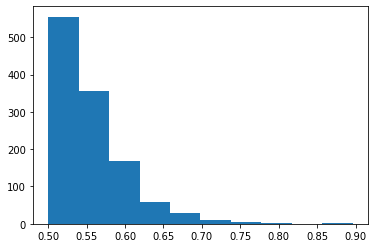

In [ ]:
plt.hist(correct_prob)

In [ ]:
incorrect_prob = 1-output_correct[output_correct['follows?'] == 1].prob_zero

(array([446., 302., 149., 100.,  69.,  37.,  24.,   8.,   6.,   3.]),
 array([0.50006746, 0.53385972, 0.56765199, 0.60144425, 0.63523651,
        0.66902878, 0.70282104, 0.7366133 , 0.77040557, 0.80419783,
        0.83799009]),
 <a list of 10 Patch objects>)

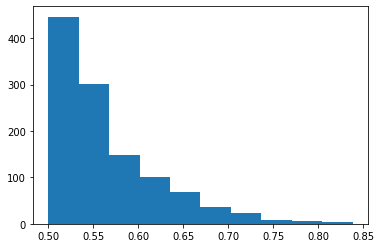

In [ ]:
plt.hist(incorrect_prob)

In [ ]:
output_correct['emoji_sentence_len'] = output_correct['emoji_sentence'].apply(lambda x: len(x))

In [ ]:
output_correct[output_correct['emoji_sentence_len'] == 1]

,index,tweets,emoji_sentence,follows?,prob_zero,emoji_sentence_len
1,42801,Watch your PH balance not my page,🙂,1,0.430891,1
5,44976,15 gcash • like and rt [USER]'s pinned • retwe...,📌,1,0.274290,1
9,75250,Hennessy and dangerous. And I can’t front like...,🙂,0,0.502358,1
12,59363,"Standing at the bus stop today, with my mask o...",😭,0,0.521341,1
13,104893,Man everything be so funny to me I can’t take ...,😔,0,0.509916,1
...,...,...,...,...,...,...
4424,15421,[USER] Ndimi munozonzi my Ex is back in thd pi...,😉,1,0.493969,1
4427,104774,[USER] YES we have a lot of different styles...,😏,0,0.516527,1
4428,37450,[USER] alright then we move just hmu whenever,🤝,1,0.465126,1
4430,18250,self sabotaged at work again and got Mac and c...,😔,1,0.487529,1


In [ ]:
output_incorrect['emoji_sentence_len'] = output_incorrect['emoji_sentence'].apply(lambda x: len(x))

In [ ]:
output_incorrect[output_incorrect['emoji_sentence_len'] == 1]

,index,tweets,emoji_sentence,follows?,prob_zero,emoji_sentence_len
0,77593,You’re just so beautiful,💀,0,0.455134,1
3,40054,Want to tease someone until they cry,😢,1,0.553649,1
4,32019,I’ll figure this out. I always do and I always...,😤,1,0.569586,1
7,35360,[USER] Can you do body rolls too?,🧐,1,0.521023,1
8,76988,good morning,🙄,0,0.249820,1
...,...,...,...,...,...,...
4429,23112,[USER] Hitting the Plymouth tomorrow. If you ...,😁,1,0.568806,1
4431,81505,[USER] [USER] I'm sorry for your loss!,😊,0,0.455440,1
4432,11677,tmap ep. 38 gave us so much happiness. Today's...,😭,1,0.571603,1
4433,14708,Learning to LOVE yourself the RIGHT away it th...,🥰,1,0.583106,1


In [ ]:
df_test['follows?'].value_counts()

0    2259
1    2179
Name: follows?, dtype: int64